In [1]:
import tensorflow as tf
import numpy as np


2022-01-17 19:42:14.211543: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-17 19:42:14.211608: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)


In [3]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])


2022-01-17 19:42:18.900660: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-17 19:42:18.901570: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-17 19:42:18.901670: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-01-17 19:42:18.901952: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-01-17 19:42:18.902053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)


In [5]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")


Comenzando entrenamiento...
Modelo entrenado!


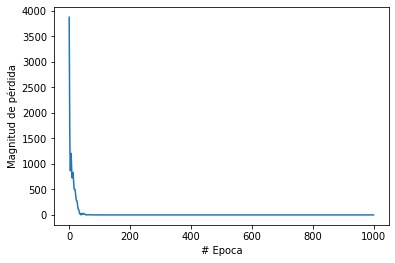

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])


In [7]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")


Hagamos una predicción!
El resultado es [[211.74739]] fahrenheit!


In [8]:
print("Variables internas del modelo")
# print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())


Variables internas del modelo
[array([[-0.42064714, -0.2380082 ,  0.8709133 ]], dtype=float32), array([2.444725 , 2.7082677, 3.8516417], dtype=float32)]
[array([[ 0.81975675,  0.62088805, -0.17288628],
       [-0.8990782 ,  0.9229369 ,  0.8286558 ],
       [ 0.11860064,  1.6303737 , -0.35411057]], dtype=float32), array([2.7212908, 3.6700432, 0.7130503], dtype=float32)]
[array([[0.40558392],
       [1.9538608 ],
       [0.05935527]], dtype=float32), array([3.4789958], dtype=float32)]
